# Cleansing Logistics Data

### Objective:
Cleanse logistics data using Python's pandas and matplotlib, and season for data exploration. The process involves removing missing values, checking inconsistencies, accuracy, and handling outliers. The final step is to create a cleaned data asset.

### Steps:

1. **Remove Missing Values:**
   - Use pandas to identify and drop rows or columns with missing values.

2. **Check Inconsistencies:**
   - Validate data consistency and identify any discrepancies.

3. **Check Accuracy:**
   - Examine data accuracy, ensuring values are within expected ranges.

4. **Handle Outliers:**
   - Use pandas and matplotlib to detect and manage outliers.

5. **Data Exploration:**
   - Utilize seaborn for data exploration, visualizing patterns and trends.

6. **Clean and Validate Data:**
   - Implement cleaning procedures and validate the dataset after each step.

7. **Create Cleaned Data Asset:**
   - Save the cleansed data to a new file for future use.

### Tools Used:
- **pandas:** Data manipulation and cleaning.
- **matplotlib:** Visualization of data and outliers.
- **seaborn:** Data exploration through visualizations.

### Final Output:
A cleaned and validated logistics dataset ready for analysis and modeling.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [35]:
logistics_df = pd.read_excel('../../assets/data/raw/logistics.xlsx')
logistics_df

,reference_id,added_time_stamp,deleted_time_stamp,time_span,destination_city,destination_state,origin_city,origin_state,comment,Miles,shipper,truck_type,min_rate,max_rate,average rate per mile
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0:02:35,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0:03:18,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0:17:27,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0:08:21,Ft Worth,TX,ABEILENE,TX,NaN,0,NaN,F,600,600,NaN
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0:57:22,ORLA,TX,ABEILENE,TX,NaN,0,NaN,F,900,900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0:04:39,SARASOTA,FL,ZWOLLE,LA,NaN,0,NaN,F,2150,2150,NaN
11417,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20:49:21,MARYLAND HE,MO,ZWOLLE,LA,NaN,0,NaN,F,1100,1250,NaN
11418,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1:06:31,LA VALLE,WI,ZWOLLE,LA,MUST TARP,1055,VFP,F,1900,2000,1.848341
11419,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2:14:40,COLFAX,WI,ZWOLLE,LA,MUST TARP,1151,VFP,F,2100,2100,1.824500


Correcting column nomenclature to snake case for consistency and ease of use:

```markdown
Original Columns:
- Miles
- average rate per mile

Corrected Columns:
- miles
- average_rate_per_mile
```

In the corrected version, column names are formatted in snake case, providing a standardized and user-friendly naming convention.

In [36]:
logistics_df.rename(
    columns={'Miles': 'miles', 'average rate per mile': 'average_rate_per_mile'}, inplace=True)
logistics_df.columns

Index(['reference_id', 'added_time_stamp', 'deleted_time_stamp', 'time_span',
       'destination_city', 'destination_state', 'origin_city', 'origin_state',
       'comment', 'miles', 'shipper', 'truck_type', 'min_rate', 'max_rate',
       'average_rate_per_mile'],
      dtype='object')

## Checking Missing Values with Visualization

To assess missing values in the logistic data, a visual representation using matplotlib can provide insights. Utilizing a bar plot allows for a quick overview of missing values in each column.

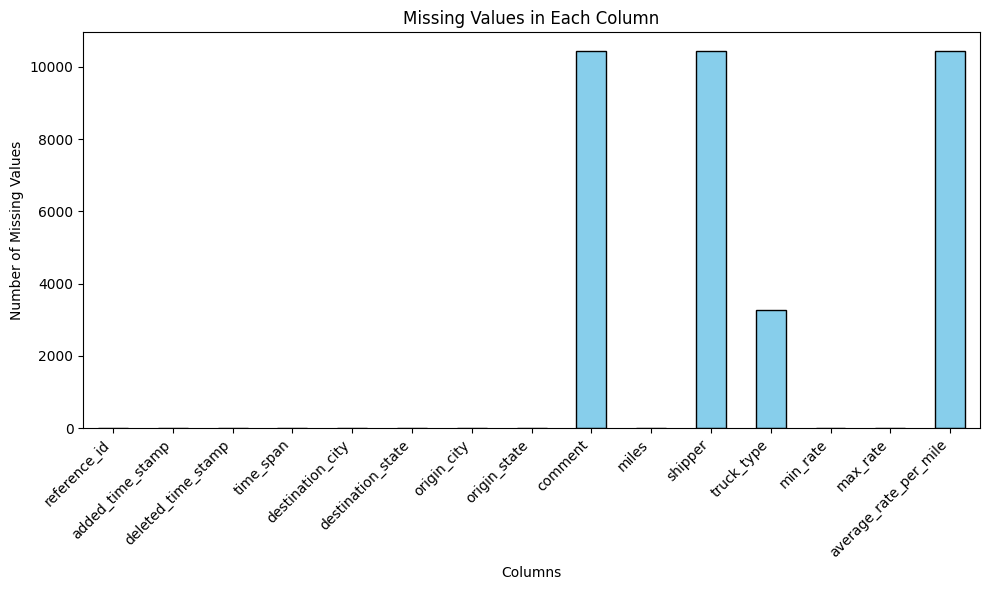

In [37]:
missing_values = logistics_df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Handling Missing Values in Logistic Data

Upon inspecting the logistic data, several columns were found to have missing values:

1. **Categorical Columns with Missing Values:**
   - `shipper`, `comment`, `truck_type`

2. **Numerical Column with Missing Values:**
   - `average_rate_per_mile`

### Handling Strategy:

#### Categorical Columns:
   - For `shipper`, `comment`, and `truck_type`, replace missing values with a constant.

#### Numerical Column:
   - For `average_rate_per_mile`, replace missing values with the mean or employ other suitable methods.

In [38]:
# All categorical columns
logistics_df.comment.fillna('NO COMMENT',inplace=True)
logistics_df.shipper.fillna('NO SHIPPER',inplace=True)
logistics_df.truck_type.fillna('NO TRUCK TYPE',inplace=True)

### Handling Missing Values in `average_rate_per_mile` Column

The `average_rate_per_mile` column has only 990 non-null values out of 11,421, making it challenging to drop rows without losing significant data. In such cases, a practical approach is to fill the missing values with zero.
Adjust the filling strategy based on the context and domain knowledge. Filling with zero is a pragmatic choice when meaningful replacement values are unavailable, and dropping rows is not feasible due to the extent of missing data.

In [39]:
logistics_df.average_rate_per_mile.fillna(0, inplace=True)

## Data Integrity and Consistency Check

Ensuring data accuracy is crucial for reliable analytics. Several aspects of integrity and consistency are vital to examine:

1. **Data Types:**
   - Confirm that each column has the correct data type to avoid misinterpretations.

2. **Range Checks:**
   - Perform range checks on numerical values to identify outliers or unexpected data.

3. **Categorical Values:**
   - Validate that categorical columns contain only predefined values.

4. **Unique Identifiers:**
   - Check for uniqueness in identifiers to prevent duplicate records.

Adjust column names accordingly and use additional checks based on specific data characteristics. Performing these checks enhances confidence in data accuracy for subsequent analytics.

In [47]:
{column: str(logistics_df[column].dtype) for column in logistics_df.columns} # Checking data types of columns

{'reference_id': 'int64',
 'added_time_stamp': 'datetime64[ns]',
 'deleted_time_stamp': 'datetime64[ns]',
 'time_span': 'object',
 'destination_city': 'object',
 'destination_state': 'object',
 'origin_city': 'object',
 'origin_state': 'object',
 'comment': 'object',
 'miles': 'int64',
 'shipper': 'object',
 'truck_type': 'object',
 'min_rate': 'int64',
 'max_rate': 'int64',
 'average_rate_per_mile': 'float64'}

### Converting Time Span to Hours

In the data, the `time_span` column is currently of type 'object,' and to enhance usability, it will be converted to a more suitable time unit, such as hours.

In [58]:
logistics_df.time_span = round(pd.to_timedelta(logistics_df.time_span).dt.total_seconds() / 3600,2)
logistics_df.rename(columns={'time_span':'time_span_in_hours'},inplace=True)

In [60]:
logistics_df

,reference_id,added_time_stamp,deleted_time_stamp,time_span_in_hours,destination_city,destination_state,origin_city,origin_state,comment,miles,shipper,truck_type,min_rate,max_rate,average_rate_per_mile
0,10711141,2023-11-28 12:07:52,2023-11-28 12:10:27,0.04,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,600,600,0.000000
1,10711143,2023-11-28 11:50:31,2023-11-28 11:53:49,0.06,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,600,600,0.000000
2,10711145,2023-11-28 12:10:26,2023-11-28 12:27:53,0.29,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,600,600,0.000000
3,10711151,2023-11-28 11:53:48,2023-11-28 12:02:09,0.14,Ft Worth,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,600,600,0.000000
4,10711155,2023-11-29 10:40:12,2023-11-29 11:37:34,0.96,ORLA,TX,ABEILENE,TX,NO COMMENT,0,NO SHIPPER,F,900,900,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11416,10724771,2023-12-12 08:09:06,2023-12-12 08:13:45,0.08,SARASOTA,FL,ZWOLLE,LA,NO COMMENT,0,NO SHIPPER,F,2150,2150,0.000000
11417,10726991,2023-12-13 12:48:07,2023-12-14 09:37:28,20.82,MARYLAND HE,MO,ZWOLLE,LA,NO COMMENT,0,NO SHIPPER,F,1100,1250,0.000000
11418,30316024,2023-12-18 16:31:11,2023-12-18 17:37:42,1.11,LA VALLE,WI,ZWOLLE,LA,MUST TARP,1055,VFP,F,1900,2000,1.848341
11419,30320680,2023-12-27 09:49:55,2023-12-27 12:04:35,2.24,COLFAX,WI,ZWOLLE,LA,MUST TARP,1151,VFP,F,2100,2100,1.824500
